## Predicting P(hit) from Exit Velocity and Launch Angle

The goal of this project is to build a simple model that estimates the probability of a hit, **P(hit)**, from a batted ball's **exit velocity (EV)** and **launch angle (LA)** using Cal Raleigh's May 2025 batted-ball data.

## 1) Setup

We import the core Python libraries we'll be using:

* **pandas/numpy** for data handling
* **matplotlib** for plotting
* **scikit-learn** for modeling with a simple **Logistic Regression** classifier

Logistic regression is a natural baseline for binary outcomes (hit vs. not hit). The output is a probability from 0 to 1.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay


## 2) Load the dataset

We load the CSV generated by our `utils.py` file. It contains each batted ball with:

* **launch_speed** (EV, in mph)
* **launch_angle** (LA, in degrees)
* **is_hit** (1 if single/double/triple/homerun, 0 otherwise)

We preview the first few rows to verify the schema.

In [5]:
csv_path = "cal_raleigh_may_batted_balls.csv"
df = pd.read_csv(csv_path)
print("Rows:", len(df))
df.head()

Rows: 56


,game_date,home_team,away_team,inning,inning_topbot,batter,pitcher,launch_speed,launch_angle,events,description,event_type,is_hit
0,2025-05-28,SEA,WSH,4,Bot,663728,592866,103.8,48.0,field_out,hit_into_play,field_out,0
1,2025-05-28,SEA,WSH,2,Bot,663728,592866,102.4,36.0,field_out,hit_into_play,field_out,0
2,2025-05-28,SEA,WSH,7,Bot,663728,695418,91.3,11.0,single,hit_into_play,single,1
3,2025-05-28,SEA,WSH,9,Bot,663728,694350,97.5,45.0,field_out,hit_into_play,field_out,0
4,2025-05-27,SEA,WSH,2,Bot,663728,680730,75.1,35.0,field_out,hit_into_play,field_out,0


## 3) Prepare features and label

* **Features (X)**: launch_speed (EV) and launch_angle (LA)
* **Label (y)**: is_hit (1 = hit, 0 = out/no hit)

We do a train/test split to estimate out-of-sample performance. Because this is a small dataset, we keep the test size modest.

In [6]:
X = df[["launch_speed", "launch_angle"]].to_numpy()
y = df["is_hit"].astype(int).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((44, 2), (12, 2))

## 4) Train a logistic regression classifier

We fit a plain **LogisticRegression** on the two features (EV and LA).

This is a minimal, readable baseline for P(hit)

In [7]:
model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train, y_train)
print("Model trained")

Model trained


## 5) Evaluate the model

We compute:

* **Accuracy**: fraction of correct classifications on the test set
* **ROC AUC**: threshold-free measure of seperability (1.0 is perfect, 0.5 is random)
* **Confusion Matrix**: which classes were confused (visualized below)

With this relatively small dataset, these metrics may be noisy. 

In [8]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")

Accuracy: 0.75
ROC AUC: 0.76


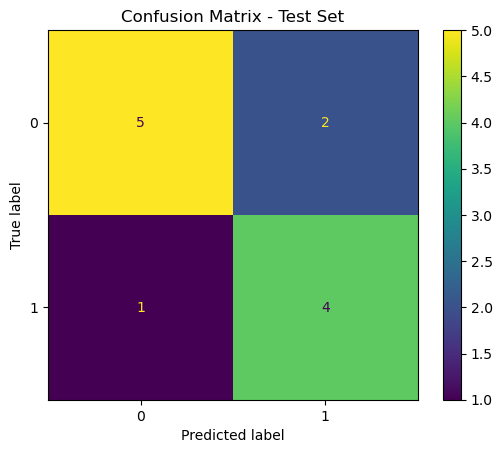

In [9]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Test Set")
plt.show()